<h1>DAte 17 June</h1>

<b>SGD classifier</b>

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import fetch_openml
import numpy as np
mnist=fetch_openml("mnist_784")

ModuleNotFoundError: No module named 'pandas'

In [3]:
len(mnist)

7

In [4]:
mnist.keys()
type(mnist)

sklearn.utils.Bunch

In [5]:
mnist.target=mnist.target.astype(np.int8)#changing data type from String to  int 

In [6]:
x,y=mnist.data,mnist.target

In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
x[100]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [10]:
len(x[100])

784

In [11]:
y[100]

5

In [47]:
import matplotlib.pyplot as plt

In [48]:
some_digit=x[44]

In [49]:
some_digit_image=some_digit.reshape(28,28)#convert 1d array to 2d array of 28*28 and it shoul dalway be a square matrix

In [50]:
import matplotlib

(-0.5, 27.5, 27.5, -0.5)

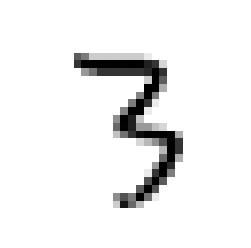

In [51]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)#for showing image(T0_whch_data_to_plot,cmap)
plt.axis("off")#for removing axis

In [52]:
y[44]

3

In [53]:
x_train,x_test=x[:60000],x[60000:]#already data hava been mixed up so we can use slicing also

In [54]:
len(x_train)

60000

In [55]:
y_train,y_test=y[:60000],y[60000:]

In [56]:
shuffel_index=np.random.permutation(60000)#suffling train data set

In [57]:
len(shuffel_index)

60000

In [58]:
x_train=x_train[shuffel_index]

In [59]:
y_train=y_train[shuffel_index]

In [60]:
y_train_5=(y_train==5)

In [122]:
y_test_5=(y_test==5)

In [123]:
len(y_train_5)

60000

In [124]:
y_train_5[10]



False

In [125]:
from sklearn.linear_model import SGDClassifier#Stochastic gradient descent classifier
sgd_slf=SGDClassifier(random_state=1)
sgd_slf.fit(X=x_train,y=y_train_5)

E:\installllll\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=1, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [126]:
sgd_slf.predict([some_digit])

array([False])

In [127]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_slf,x_train,y_train_5, cv=3)
len(y_train_pred)

E:\installllll\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\installllll\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\installllll\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 a

60000

In [128]:

cm=metrics.confusion_matrix(y_train_5,y_train_pred)

In [129]:
import seaborn as sn

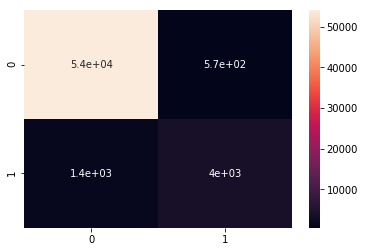

In [130]:
sn.heatmap(cm,annot=True)

In [142]:
#from sklearn.linear_model import SGDClassifier
sgd_slf_all=SGDClassifier(random_state=1)
sgd_slf_all.fit(x_train,y_train)

E:\installllll\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=1, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [143]:
sgd_slf_all.predict([x_train[16000]])

array([7], dtype=int8)

In [144]:
y_train[16000]

7

(-0.5, 27.5, 27.5, -0.5)

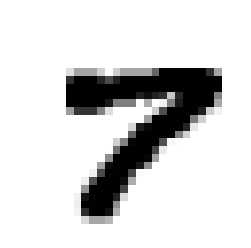

In [145]:

plt.imshow(x_train[16000].reshape(28,28),cmap=matplotlib.cm.binary)#for showing image(T0_whch_data_to_plot,cmap)
plt.axis("off")#for removing axis

In [146]:
#from sklearn.model_selection import cross_val_predict
y_train_pred_all=cross_val_predict(sgd_slf_all,x_train,y_train, cv=3)
len(y_train_pred_all)

E:\installllll\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\installllll\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\installllll\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 a

60000

In [147]:
cm_all=metrics.confusion_matrix(y_train,y_train_pred_all)

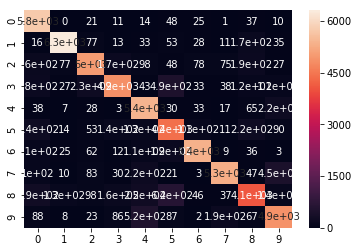

In [148]:
sn.heatmap(cm_all,annot=True)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]